# Sympy ##

We will have a quick look at the Symbolic Python or sympy library, which is described in full [here](https://www.sympy.org/en/index.html). This library provides Python tools for solving equations, differentiating and integrating functions, expanding functions as series and other symbolic manipulations.

## Sympy introduction - defining equations

In order to use sympy, we have to import it in the same way we import numpy. Let's do that and then look at a first example.

In [1]:
import sympy as sp
#
x, a, b, c = sp.symbols('x a b c')
quadEq =  sp.Eq(a*x**2 + b*x + c, 0)
print("The quadratic equation is",quadEq)

The quadratic equation is Eq(a*x**2 + b*x + c, 0)


As we can see above, the first thing we have done is defined the symbols we want to use. The statement:
```Python
x, a, b, c = sp.symbols('x a b c')
```
tells sympy that `x`, `a`, `b` and `c` are to be treated as algebraic symbols. (These don't need to be single letters, for example, we could define `theta = sp.symbols('theta')`.)

Our next step was to define the quadratic equation $ax^2 + bx + c = 0$. To do this, we can't write `a*x**2 + b*x + c = 0`, because Python uses the `=` character to assign values to variables (e.g. `y = 18.0` or `y = np.cos(1.3)`). We also can't define the quadratic equation by writing `a*x**2 + b*x + c == 0`, because `==` tests whether what's to its left is identical to whatever's to its right and returns the value `True` or `False` accordingly. Hence the syntax:
```Python
sp.Eq(a*x**2 + b*x + c, 0)
```
is used to indicate that the left hand side (LHS) `a*x**2 + b*x + c` is equal to the right hand side (RHS) `0`.

## Solving equations
Having defined an equation, can we solve it?  

In [2]:
import sympy as sp
quadSol = sp.solve(quadEq, x)
print("Solution of",quadEq,"is x =",quadSol)

Solution of Eq(a*x**2 + b*x + c, 0) is x = [(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


The `sp.solve` statement solves the equation we have set up (`sp.solves`'s first argument) for the variable indicated (`sp.solve`'s second argument), and we see that it has returned the expected solutions for the quadratic equation:

$$
x = \frac{-b + \sqrt{b^2 - 4ac}}{2a}
$$
and
$$
x = \frac{-b - \sqrt{b^2 - 4ac}}{2a}.
$$

We can find out from sympy how many solutions there are and get at the solutions separately as follows.

In [3]:
nQuadSols = len(quadSol)
for n in range(0, nQuadSols):
    print("Solution",n,"is",quadSol[n])

Solution 0 is (-b + sqrt(-4*a*c + b**2))/(2*a)
Solution 1 is -(b + sqrt(-4*a*c + b**2))/(2*a)


Note that in order to use `sp.solve`, the RHS of the equation has to be zero. For example, if we were given the equation $ax^3 + bx^2 = cx$ to solve, we would first have to rewrite it as $ax^3 + bx^2 - cx = 0$, then we could determine the solution as follows.

In [4]:
cubicSol = sp.solve(a*x**3 + b*x**2 - c*x, x)
nCubicSols = len(cubicSol)
for n in range(0, nCubicSols):
    print("Solution",n,"is",cubicSol[n])

Solution 0 is 0
Solution 1 is -b/(2*a) - sqrt(4*a*c + b**2)/(2*a)
Solution 2 is -b/(2*a) + sqrt(4*a*c + b**2)/(2*a)


Use sympy to solve the equation $4\sin \theta + 5 \cos \theta = 1$.

In [5]:
theta = sp.symbols('theta')
sinEq = sp.Eq(4*sp.sin(theta)  + 5*sp.cos(theta) - 1, 0)
sinSol = sp.solve(sinEq, theta)
nSinSols = len(sinSol)
for n in range(0, nSinSols):
    print("Solution",n,"is",sinSol[n])

Solution 0 is 2*atan(2/3 - sqrt(10)/3)
Solution 1 is 2*atan(2/3 + sqrt(10)/3)


Note, as we have done above (e.g. `quadSol = sp.solve(quadEq, x)`) we can assign a symbolic expression to a variable. Here is another example.

In [6]:
y = a*x**2 + b*x + c
print("Solution of",y,"= 0 is x =",sp.solve(y, x))

Solution of a*x**2 + b*x + c = 0 is x = [(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


This does not define a function $y(x)$, it just assigns the symbolic expression `a*x**2 + b*x + c` to the variable `y`. The following expression will therefore produce an error message. 

In [7]:
print("y(2) =",y(2))

TypeError: 'Add' object is not callable

If we want to define a symbolic function, we can use the normal Python syntax for creating functions (having defined the relevant symbols):

In [8]:
x, a, b, c = sp.symbols('x a b c')
#
def quad(x):
    f = a*x**2 + b*x + c
    return f
#
print("Solution of quad(x) = 0 is x =",sp.solve(quad(x), x))

Solution of quad(x) = 0 is x = [(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


We can now use this Python function to evaluate `quad(x)` for a specific value of `x`:

In [9]:
print("quad(2) =",quad(2))

quad(2) = 4*a + 2*b + c


Note that we get a symbolic answer, as `a`, `b` and `c` are symbols. We can check this, e.g. for `a`, by looking at the type of `a`:

In [10]:
print("Type of a is",type(a))

Type of a is <class 'sympy.core.symbol.Symbol'>


If we assign numerical values to `a`, `b` and `c`, `quad(2)` will return numbers for the solutions of the equation:

In [11]:
a = 2
b = 3
c = 1
print("quad(2) =",quad(2))
print("Solution of quad(x) = 0 is x =",sp.solve(quad(x), x))

quad(2) = 15
Solution of quad(x) = 0 is x = [-1, -1/2]


The disadvantage of giving `a`, `b` and `c` specific values in this way is that we can no longer use them as symbolic objects. 
E.g. if we re-check the type of `a`, we will find that it is now an integer.

In [12]:
print("Type of a after assigning integer value is",type(a))

Type of a after assigning integer value is <class 'int'>


There is an alternative method. Let's first turn `a`, `b` and `c` back into symbols and check that they are behaving as we want them to.

In [13]:
a, b, c = sp.symbols('a b c')
print("Type of a after setting as symbol is",type(a))
print("quad(2) =",quad(2))

Type of a after setting as symbol is <class 'sympy.core.symbol.Symbol'>
quad(2) = 4*a + 2*b + c


Now substitute the numerical value 3 for `a` using `subs(a, 3)`. We can check that `a` is given the value 3 when we do this, and that `a` is still a symbol, as follows:

In [14]:
print("quad(x).subs(a, 3) =",quad(x).subs(a, 3))
print("quad(2).subs(a, 3) =",quad(2).subs(a, 3))
print("Type of a is",type(a))

quad(x).subs(a, 3) = b*x + c + 3*x**2
quad(2).subs(a, 3) = 2*b + c + 12
Type of a is <class 'sympy.core.symbol.Symbol'>


We can substitute more than one numerical value into an expression:

In [15]:
print("quad(x).subs(a, 3).subs(b = -2.4).subs(c = 17/3) =",quad(x).subs(a, 3).subs(b, -2.4).subs(c, 17/3))
print("quad(2).subs(a, 3).subs(b = -2.4).subs(c = 17/3) =",quad(2).subs(a, 3).subs(b, -2.4).subs(c, 17/3))

quad(x).subs(a, 3).subs(b = -2.4).subs(c = 17/3) = 3*x**2 - 2.4*x + 5.66666666666667
quad(2).subs(a, 3).subs(b = -2.4).subs(c = 17/3) = 12.8666666666667


We can also substitute another symbolic value:

In [16]:
print("quad(x).subs(a, x) =",quad(x).subs(a, x))
print("quad(x).subs(a, y) =",quad(x).subs(a, y))

quad(x).subs(a, x) = b*x + c + x**3
quad(x).subs(a, y) = b*x + c + x**2*(a*x**2 + b*x + c)


## Solveset and the future of solve

In time, the authors of sympy hope to replace `sp.solve` with a new routine, `sp.solveset`(see [here](https://docs.sympy.org/latest/modules/solvers/solveset.html) for a description), which is used in a similar but not quite identical way. For the moment `sp.solve` can cope with more types of equations than `sp.solveset`. An example using `sp.solveset` is shown below. Notice that it removes the restriction that the equation must be presented with the RHS being zero.

In [17]:
z, p, q, r = sp.symbols('z p q r')
newQuadEq =  sp.Eq(p*z**2 + q*z, -r)
print("This quadratic equation is",newQuadEq)
#
newQuadSol = sp.solveset(newQuadEq, z)
print("Its solution is",newQuadSol)

This quadratic equation is Eq(p*z**2 + q*z, -r)
Its solution is {-q/(2*p) - sqrt(-4*p*r + q**2)/(2*p), -q/(2*p) + sqrt(-4*p*r + q**2)/(2*p)}


The curly brackets indicate that the solutions are not given as a list as with `sp.solve`, but as (for us) a new data type, a set. This allows `sp.solveset` to deal with situations where there is an infinite number of solutions, but means these have to be accessed in a slightly different way. If the number of solutions is finite, the following works.  

In [18]:
nSol = 0
for sol in newQuadSol:
    print("Solution",nSol,"is",sol)
    nSol += 1

Solution 0 is -q/(2*p) - sqrt(-4*p*r + q**2)/(2*p)
Solution 1 is -q/(2*p) + sqrt(-4*p*r + q**2)/(2*p)


## Fractions

Fractions (rational numbers) can be entered as below.

In [19]:
alpha = sp.Rational(1, 137)
print("alpha =",alpha)

alpha = 1/137


They can be added, subtracted, multiplied and divided.

In [20]:
half = sp.Rational(1, 2)
quarter = sp.Rational(1, 4)
print("half + quarter =",half + quarter)
print("half - quarter =",half - quarter)
print("half*quarter =",half*quarter)
print("half/quarter =",half/quarter)

half + quarter = 3/4
half - quarter = 1/4
half*quarter = 1/8
half/quarter = 2


Of course, you don't have to assign variable names to fractions before manipulating them, and fractions can be turned into floats.

In [21]:
ans = sp.Rational(3, 137) - sp.Rational(17, 13)
print("ans =",ans)
print("ans as float =",float(ans))

ans = -2290/1781
ans as float = -1.2857944974733295


## Differentiation

Sympy provides a routine for differentiating. You must give it the expression you want to differentiate and the variable with respect to which the differentiation should be peformed, as shown below. 

In [22]:
print("The differential of a*x**5 + b*x**2 + c/x**3 w.r.t. x is",sp.diff(a*x**5 + b*x**2 + c/x**3, x))
print("The differential of quad(x) w.r.t. x is",sp.diff(quad(x), x))

The differential of a*x**5 + b*x**2 + c/x**3 w.r.t. x is 5*a*x**4 + 2*b*x - 3*c/x**4
The differential of quad(x) w.r.t. x is 2*a*x + b


The second (and higher) differentials can also be calculated (in several ways).

In [23]:
print("Second differential is",sp.diff(sp.diff(a*x**5 + b*x**2 + c/x**3, x),x))
print("Second differential is",sp.diff(a*x**5 + b*x**2 + c/x**3, x, x))
print("Second differential is",sp.diff(a*x**5 + b*x**2 + c/x**3, x, 2))

Second differential is 20*a*x**3 + 2*b + 12*c/x**5
Second differential is 2*(10*a*x**3 + b + 6*c/x**5)
Second differential is 2*(10*a*x**3 + b + 6*c/x**5)


Notice the output from the first of these methods is written differently to that from the latter two, but we can check they are the same by subtracting them and using `sp.simplify` to simplify the result!

In [24]:
sp.simplify(sp.diff(sp.diff(a*x**5 + b*x**2 + c/x**3, x),x) - sp.diff(a*x**5 + b*x**2 + c/x**3, x, 2))

0

Find the first derivative w.r.t $x$ of the function:

\begin{align*}
s(x) = A\left( {\tanh \left[\frac{x - x_0}{L} + \frac{w}{2L}\right] - \tanh \left[\frac{x - x_0}{R} - \frac{w}{2R}\right]} \right).
\end{align*}

Using the values $A = 2.0$, $x_0 = 0.5$, $L = 1.1$, $R = 0.5$ and $w = 0.4$, plot the function and its derivative in the range $-2 < x < 3$ using numpy and matplotlib.

*Hint, you can copy the output from the differentiation and paste it into your code for doing the plotting. It will need some editing, but not much! This can save you a lot of time and helps avoid typos.* 

In [25]:
A, x, x0, L, R, w = sp.symbols('A x x0 L R w')
def s(x):
    s = A*(sp.tanh((x - x0)/L + w/(2*L)) - sp.tanh((x-x0)/R - w/(2*R)))
    return s
#
s_ = sp.diff(s(x), x)
print(s_)

A*(-(1 - tanh(-w/(2*R) + (x - x0)/R)**2)/R + (1 - tanh(w/(2*L) + (x - x0)/L)**2)/L)


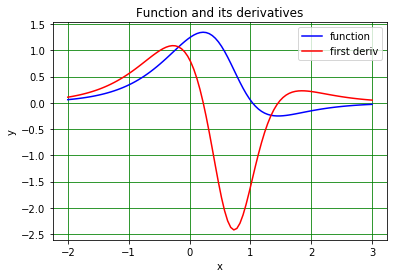

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
def func(x):
    f = A*(np.tanh((x - x0)/L + w/(2*L)) - np.tanh((x-x0)/R - w/(2*R)))
    return f
#
def dfunc(x):
    f = A*(-(-np.tanh(-w/(2*R) + (x - x0)/R)**2 + 1)/R + (-np.tanh(w/(2*L) + (x - x0)/L)**2 + 1)/L)
    return f
#
A = 2.0
x0 = 0.5
L = 1.1
R = 0.5
w = 0.4
#
xArr = np.linspace(-2, 3, 100)
yArr = func(xArr)
dyArr = dfunc(xArr)
#
plt.figure(figsize = (6, 4))
plt.title("Function and its derivatives")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, color = 'b', label = "function")
plt.plot(xArr, dyArr, color = 'r', label = "first deriv")
plt.grid(color = 'g')
plt.legend()
plt.show()

## Integration

The syntax for performing indefinite integration (i.e. without limits) is similar to that for differentiation. Note that sympy does not add a constant of integration to indefinite integrals, you have to think about what you need to do about these yourself!

In [27]:
intQuad = sp.integrate(quad(x), x)
print("Integral of",quad(x),"w.r.t. x is",intQuad)

Integral of a*x**2 + b*x + c w.r.t. x is a*x**3/3 + b*x**2/2 + c*x


If we want to evaluate this integral with particular values of `a`, `b`, `c` and `x` we must `sp.subs` all of these, including `x`, as `intQuad` is not a function.

In [28]:
print("Integral of",quad(x),"with a = 1, b = 2, c = -1 and x = 4 is",intQuad.subs(a, 1).subs(b, 2).subs(c, -1).subs(x, 4))

Integral of a*x**2 + b*x + c with a = 1, b = 2, c = -1 and x = 4 is 100/3


If you want to do a definite integral, give `sp.integrate` a tuple containing the variable and the range over which the integration should take place.

In [29]:
intQuadLim = sp.integrate(quad(x), (x, -1, 2))
print("Integral of",quad(x),"w.r.t. x over range -1 to 2 is",intQuadLim)

Integral of a*x**2 + b*x + c w.r.t. x over range -1 to 2 is 3*a + 3*b/2 + 3*c


Numerical values of `a`, `b`, and `c` can be provided as previously described. The substitution can be made before or after the integration.

In [30]:
intQuadLim1 = sp.integrate(quad(x).subs(a, 1).subs(b, 2).subs(c, -1), (x, -1, 2))
intQuadLim2 = sp.integrate(quad(x), (x, -1, 2)).subs(a, 1).subs(b, 2).subs(c, -1)
print("Integral of",quad(x),"w.r.t. x over range -2 to 2 is",intQuadLim1)
print("Integral of",quad(x),"w.r.t. x over range -2 to 2 is",intQuadLim2)

Integral of a*x**2 + b*x + c w.r.t. x over range -2 to 2 is 3
Integral of a*x**2 + b*x + c w.r.t. x over range -2 to 2 is 3


## Plotting with sympy

We can demonstrate the plotting capabilities of sympy by plotting `quad` and its integral. Sympy does this via an interface to matplotlib, but the syntax for making the plots is a little different to that we have seen so far. Here are the two plots as two  separate figures.

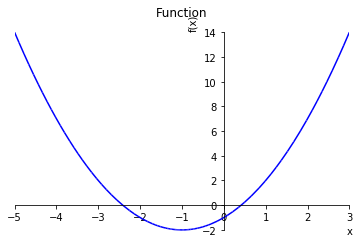

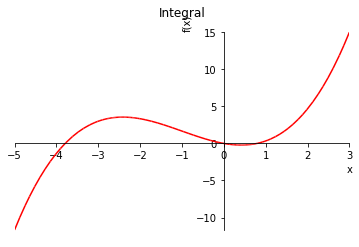

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
#
sp.plot(quad(x).subs(a, 1).subs(b, 2).subs(c, -1),(x, -5, 3), line_color = 'blue', title = "Function")
sp.plot(intQuad.subs(a, 1).subs(b, 2).subs(c, -1).subs(x, x),(x, -5, 3), line_color = 'red', title = "Integral")
plt.show()

And here they are plotted together. (Getting two different line colours is a little convoluted!)

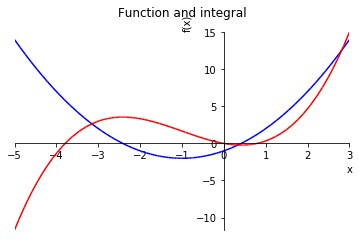

In [32]:
thisPlot = sp.plot(quad(x).subs(a, 1).subs(b, 2).subs(c, -1),
                   intQuad.subs(a, 1).subs(b, 2).subs(c, -1).subs(x, x),
                   (x, -5, 3), show = False, title = "Function and integral")
thisPlot[0].line_color = 'blue'
thisPlot[1].line_color = 'red'
thisPlot.show()

## Solving differential equations

A range of ordinary differential equations can be solved with sympy using `dsolve`. We will look at the equation:

$$
\frac {dg}{dt} = \exp(-t) - g,
$$ 

with the inital condition $g(0) = 1$. In order to set up this, or any, differential equation in sympy, we first have to define the function we want to solve for, in this case $g$. As we don't know what this will be until we have solved the equation, we can't write down an explicit form for it. Sympy allows us to define a general function using `sp.Function` as below. When defined like this, $g$ can be a function of anything and can have any functional form. We have to make sure we refer to it consistently; in this example, we must refer to it explicitly as a function of $t$. 

In [33]:
t = sp.symbols("t")
g = sp.Function("g")
diffEq = sp.Eq(g(t).diff(t), sp.exp(-t) - g(t))
solDiffEq = sp.dsolve(diffEq, g(t))
print("Solution of differential equation is",solDiffEq)

Solution of differential equation is Eq(g(t), (C1 + t)*exp(-t))


Notice how we have defined the derivative w.r.t. $t$ in the above: `g(t).diff(t)`.

An alternative method of solving the equation requires that we rewrite it so that the RHS is zero:

$$
\frac {dg}{dt} - \exp(-t) + g = 0.
$$ 

We can then solve it as below. Note also the alternative way of defining $\frac{d}{dt} g(t)$.

In [34]:
g_ = sp.Derivative(g(t), t)
print("Solution of differential equation is",sp.dsolve(g_ - sp.exp(-t) + g(t), g(t)))

Solution of differential equation is Eq(g(t), (C1 + t)*exp(-t))


Which ever method we choose, we now have to find the arbitrary constant `C1`. This can be done using symbolic methods as below. Note that the statement `Eq(1, C1)` is an equation that tells us $1 = C1$, as described above!

In [35]:
equationForC1 = solDiffEq.subs([(t, 0), (g(0), 1)])
print("Equation for C1 is",equationForC1)

Equation for C1 is Eq(1, C1)


Solve symbolically the equation that describes radioactive decay,

$$
\frac {d N}{d t} = -\frac{N}{\tau},
$$ 

using the fact that at time $t = 0$ the number of nuclei is $N_0$.

(This equation describes the situation in which the number of decays per unit time in a sample is proportional to the number of remaining nuclei, $N$. Hence the rate of change in $N$ with time, $\frac {d N}{d t}$ is proportional to $-N$.)

In [36]:
t, tau, N0 = sp.symbols('t tau N0')
N = sp.Function("N")
decayEq = sp.Eq(N(t).diff(t), -N(t)/tau)
solDecayEq = sp.dsolve(decayEq, N(t))
print("Solution of decay equation is",solDecayEq)
equationForC1 = solDecayEq.subs([(t, 0), (N(0), N0)])
print("Equation for C1 is",equationForC1)

Solution of decay equation is Eq(N(t), C1*exp(-t/tau))
Equation for C1 is Eq(N0, C1)


Hence result is $N(t) = N_0 \exp{\left[-\frac{t}{\tau}\right]}$, as expected!

## Series

Sympy knows about Taylor series. To use them, we must specify the function we want to express as a series and the variable in which we want the expansion to be done. We can also specify the point around which the expansion should be made ($\pi/4$ in the example below) and the maximum power in the expansion (the 3 below means we get terms up to the power 2). Look at [the documentation](https://docs.sympy.org/latest/modules/series/index.html) for more information! The example is the determination of the Taylor expansion for the sine function.

In [37]:
sinSeries = sp.sin(x).series(x, sp.pi/4, 3)
print("First terms in Taylor series for sine function about pi/4 are",sinSeries)

First terms in Taylor series for sine function about pi/4 are sqrt(2)/2 + sqrt(2)*(x - pi/4)/2 - sqrt(2)*(x - pi/4)**2/4 + O((x - pi/4)**3, (x, pi/4))


Using numpy and matplotlib, plot a graph showing a cosine function in the $\theta$ range $0...\pi$. Superimpose on this a plot of the sum of the Taylor series for the cosine up to and including the $\theta^3$ term, expanded about $\pi/2$.

In [38]:
# <-- Demo -->
#
cosSeries = sp.cos(x).series(x, sp.pi/2, 5)
print("cosSeries\n",cosSeries)

cosSeries
 pi/2 + (x - pi/2)**3/6 - x + O((x - pi/2)**5, (x, pi/2))


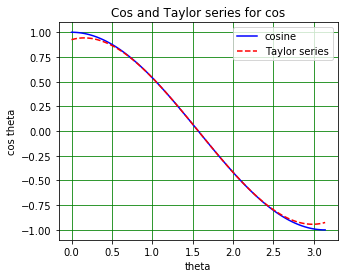

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
def cosTaylor(Q):
    c = np.pi/2 + (Q - np.pi/2)**3/6 - Q
    return c
#
thetaArr = np.linspace(0, np.pi, 100)
plt.figure(figsize = (5, 4))
plt.title("Cos and Taylor series for cos")
plt.xlabel("theta")
plt.ylabel("cos theta")
plt.plot(thetaArr, np.cos(thetaArr), color = 'b', label = 'cosine')
plt.plot(thetaArr, cosTaylor(thetaArr), color = 'r', linestyle = '--', label = "Taylor series")
plt.legend()
plt.grid(color = 'g')
plt.show()

## Matrices and linear equations

This section is here for information only as you have yet to look at matrices in maths! 

Matrices can be defined and inverted as shown here.

In [40]:
A = sp.Matrix(([3, 7], [4, -2]))
invA = A.inv()
AinvA = A*invA
invAA = invA*A
print("This is the matrix A\n",A)
print("Its inverse is\n",invA)
print("A multplied by its inverse is\n",AinvA)
print("The inverse of A multplied y A is\n",invAA)
print("As expected, both multiplications give the unit matrix!")

This is the matrix A
 Matrix([[3, 7], [4, -2]])
Its inverse is
 Matrix([[1/17, 7/34], [2/17, -3/34]])
A multplied by its inverse is
 Matrix([[1, 0], [0, 1]])
The inverse of A multplied y A is
 Matrix([[1, 0], [0, 1]])
As expected, both multiplications give the unit matrix!


Systems of linear equations can be defined and solved using matrices. For example, consider the equations:

\begin{align*}
3x + 4y &= 7 \\
x - 3y &= 2.
\end{align*}

These can be written:
$$
\left( {\begin{array}{*{20}{c}}
3&4\\
1&{ - 3}
\end{array}} \right)\left( {\begin{array}{*{20}{c}}
x\\
y
\end{array}} \right) = \left( {\begin{array}{*{20}{c}}
7\\
2
\end{array}} \right)
$$

Defining
$M = \left( {\begin{array}{*{20}{c}}
3&4\\
1&{ - 3}
\end{array}} \right)$,
$\vec x  = \left( {\begin{array}{*{20}{c}}
x\\
y
\end{array}} \right)$
and
$\vec c  = \left( {\begin{array}{*{20}{c}}
7\\
2
\end{array}} \right)$,
we have
$M \vec x  =  
\vec c$.
The solution is obtained by multiplying through by $M^{-1}$, the inverse of $M$, and using the fact that $M^{-1}M = I$, the unit matrix:

\begin{align*}
{M^{ - 1}}M  \vec x  &= {M^{ - 1}} \vec c \\
  \vec x  &= {M^{ - 1}} 
\vec c.
\end{align*}

Using sympy, this can be done as follows. (Note we start by redefining $x$ and $y$ so we do not use the assignments above!)

In [41]:
x, y = sp.symbols('x y')
M = sp.Matrix(([3, 4], [1, -3]))
X = sp.Matrix((x, y))
C = sp.Matrix((7, 2))
invM = M.inv()
solVect = invM*C
print("Equations to solve",M*X,'=',C)
print("Solution is",X,"=",solVect)

Equations to solve Matrix([[3*x + 4*y], [x - 3*y]]) = Matrix([[7], [2]])
Solution is Matrix([[x], [y]]) = Matrix([[29/13], [1/13]])


The solution is therefore:

\begin{align*}
\left(
\begin{array}{c}
x \\
y
\end{array} 
\right) =
\left( \begin{array}{c}
\frac{29}{13} \\
\frac{1}{13}
\end{array} \right),
\end{align*}

or

\begin{align*}
x &= \frac{29}{13} \\
y &= \frac{1}{13}.
\end{align*}

This system of equations can of course easily be solved by hand, but sympy will cope with systems of equations that would cause even Bradley Cheal to despair!

## Odds and ends

You can print equations from sympy in LaTeX format, so they can be copied and pasted into Markdown cells or documents. An example is shown below.

In [ ]:
print(sp.latex(sp.Integral(sp.sqrt(1/x), x)))

<!-- Student -->
You can also get sympy to write its results to the screen in a more legible format by giving the command `sp.init_printing()`. This looks on your computer to find the most attractive printing mode available (e.g. LaTeX if you have it installed) and uses that. The disadvantage of using this mode is that you can't copy and paste the output into code cells.

In [ ]:
import sympy as sp
sp.init_printing()
#
sp.solve(a*x**2 + b*x + c, x)

If you want to turn "posh printing" off, you can do:

In [44]:
sp.init_printing(pretty_print = False)
#
sp.solve(a*x**2 + b*x + c, x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]